In [1]:
import warnings 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/road-accidents-data/dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2023.csv')

In [3]:
df.head()

,collision_index,collision_year,collision_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,2023010419171,2023,010419171,1,1,3,2,20,4,3,5,1,0,0,0,0,1,10,E01030370
1,2023010419183,2023,010419183,2,1,1,1,25,5,3,0,0,0,0,0,9,1,3,E01001546
2,2023010419183,2023,010419183,3,2,2,2,38,7,3,0,0,2,0,0,9,-1,-1,-1
3,2023010419189,2023,010419189,1,1,1,1,50,8,3,0,0,0,0,0,9,1,5,E01002443
4,2023010419191,2023,010419191,2,1,1,1,34,6,3,0,0,0,0,0,1,1,2,E01004679


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62674 entries, 0 to 62673
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   collision_index                     62674 non-null  object
 1   collision_year                      62674 non-null  int64 
 2   collision_reference                 62674 non-null  object
 3   vehicle_reference                   62674 non-null  int64 
 4   casualty_reference                  62674 non-null  int64 
 5   casualty_class                      62674 non-null  int64 
 6   sex_of_casualty                     62674 non-null  int64 
 7   age_of_casualty                     62674 non-null  int64 
 8   age_band_of_casualty                62674 non-null  int64 
 9   casualty_severity                   62674 non-null  int64 
 10  pedestrian_location                 62674 non-null  int64 
 11  pedestrian_movement                 62674 non-null  in

In [5]:
df.isna().sum()

collision_index                       0
collision_year                        0
collision_reference                   0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
lsoa_of_casualty                      0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
collision_year,62674.0,2023.000000,0.000000,2023.0,2023.0,2023.0,2023.0,2023.0
vehicle_reference,62674.0,1.467562,4.849047,1.0,1.0,1.0,2.0,992.0
casualty_reference,62674.0,1.374972,1.551044,1.0,1.0,1.0,1.0,70.0
casualty_class,62674.0,1.491177,0.737688,1.0,1.0,1.0,2.0,3.0
sex_of_casualty,62674.0,1.358107,0.548781,-1.0,1.0,1.0,2.0,9.0
age_of_casualty,62674.0,36.953697,19.805649,-1.0,22.0,34.0,51.0,102.0
age_band_of_casualty,62674.0,6.315410,2.491679,-1.0,5.0,6.0,8.0,11.0
casualty_severity,62674.0,2.785046,0.438231,1.0,3.0,3.0,3.0,3.0
pedestrian_location,62674.0,0.808709,2.208673,-1.0,0.0,0.0,0.0,10.0
pedestrian_movement,62674.0,0.663369,2.041672,0.0,0.0,0.0,0.0,9.0


In [7]:
df[df.columns[1]].dtype == 'int64'

True

In [8]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(col)

collision_index
collision_reference
lsoa_of_casualty


In [9]:
for col in df.columns:
    print(f'{col} : {df[col].value_counts().size}')

collision_index : 49316
collision_year : 1
collision_reference : 49316
vehicle_reference : 19
casualty_reference : 70
casualty_class : 3
sex_of_casualty : 4
age_of_casualty : 104
age_band_of_casualty : 12
casualty_severity : 3
pedestrian_location : 12
pedestrian_movement : 10
car_passenger : 5
bus_or_coach_passenger : 7
pedestrian_road_maintenance_worker : 4
casualty_type : 22
casualty_home_area_type : 4
casualty_imd_decile : 11
lsoa_of_casualty : 24113


In [10]:
df.head()

,collision_index,collision_year,collision_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,2023010419171,2023,010419171,1,1,3,2,20,4,3,5,1,0,0,0,0,1,10,E01030370
1,2023010419183,2023,010419183,2,1,1,1,25,5,3,0,0,0,0,0,9,1,3,E01001546
2,2023010419183,2023,010419183,3,2,2,2,38,7,3,0,0,2,0,0,9,-1,-1,-1
3,2023010419189,2023,010419189,1,1,1,1,50,8,3,0,0,0,0,0,9,1,5,E01002443
4,2023010419191,2023,010419191,2,1,1,1,34,6,3,0,0,0,0,0,1,1,2,E01004679


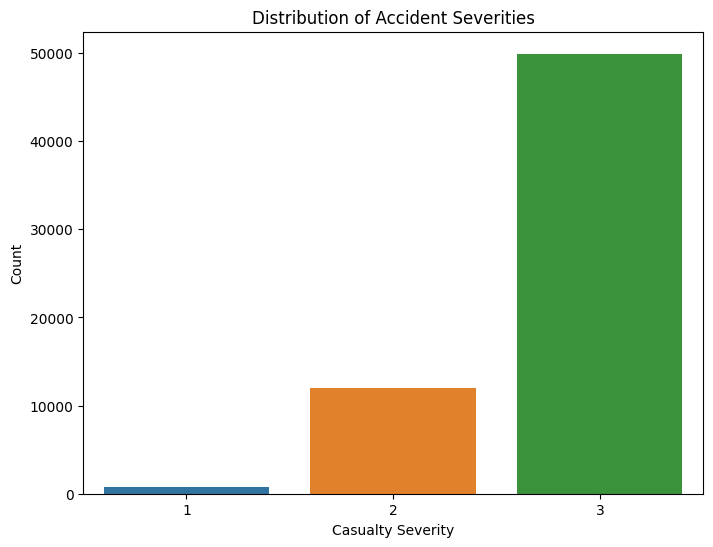

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='casualty_severity', data=df)
plt.title('Distribution of Accident Severities')
plt.xlabel('Casualty Severity')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='casualty_severity', ylabel='age_of_casualty'>

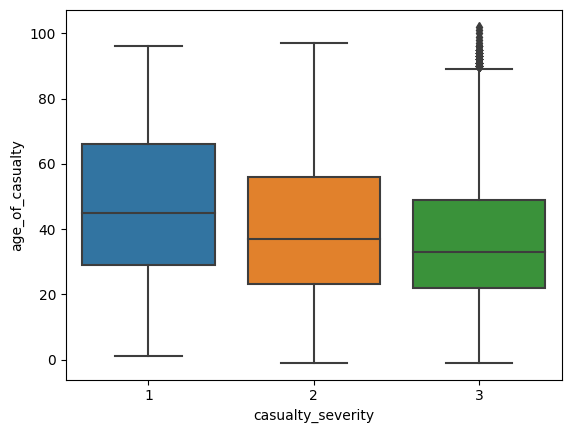

In [12]:
sns.boxplot(x = 'casualty_severity',y = 'age_of_casualty',data = df)

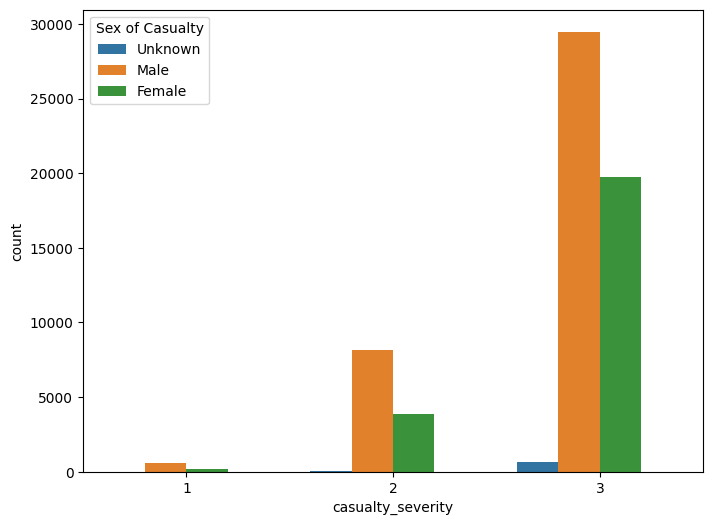

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='casualty_severity', hue='sex_of_casualty', data=df)
plt.legend(title='Sex of Casualty', labels=['Unknown', 'Male', 'Female'])
plt.show()

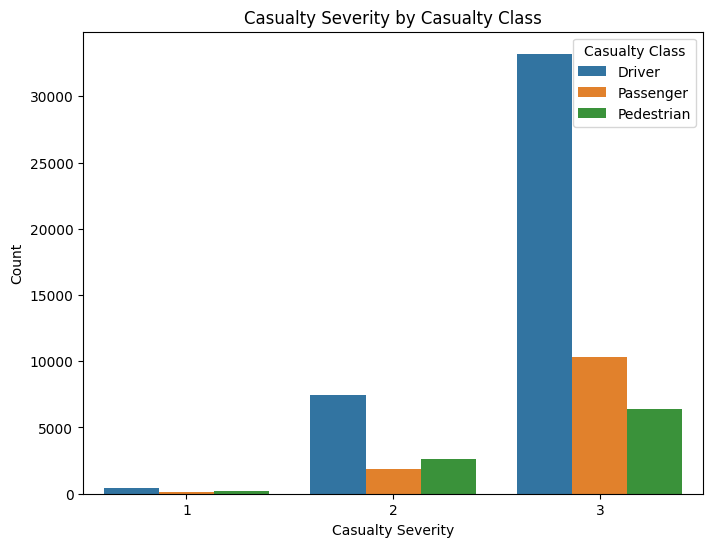

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='casualty_severity', hue='casualty_class', data=df)
plt.title('Casualty Severity by Casualty Class')
plt.xlabel('Casualty Severity')
plt.ylabel('Count')
plt.legend(title='Casualty Class', labels=['Driver', 'Passenger', 'Pedestrian'])
plt.show()

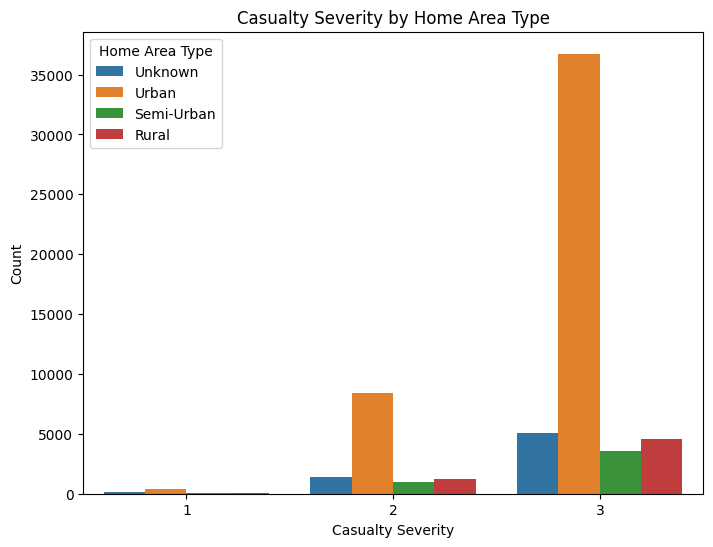

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='casualty_severity', hue='casualty_home_area_type', data=df)
plt.title('Casualty Severity by Home Area Type')
plt.xlabel('Casualty Severity')
plt.ylabel('Count')
plt.legend(title='Home Area Type', labels=['Unknown', 'Urban', 'Semi-Urban', 'Rural'])
plt.show()

<Axes: xlabel='casualty_severity', ylabel='casualty_imd_decile'>

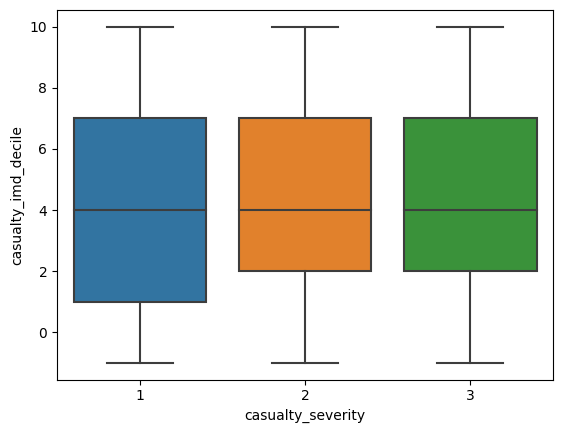

In [16]:
sns.boxplot(x='casualty_severity', y='casualty_imd_decile', data=df)

<Axes: xlabel='casualty_type', ylabel='count'>

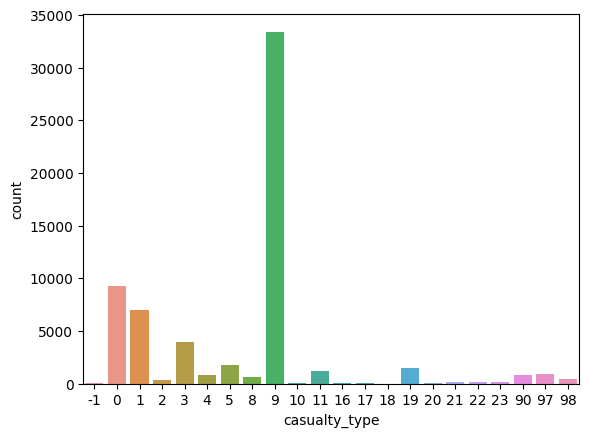

In [17]:
sns.countplot(x='casualty_type', data=df)

<Axes: xlabel='casualty_severity', ylabel='casualty_type'>

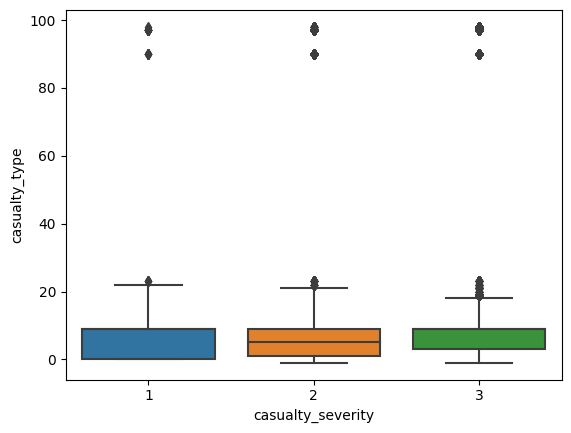

In [18]:
sns.boxplot(x='casualty_severity', y='casualty_type', data=df)

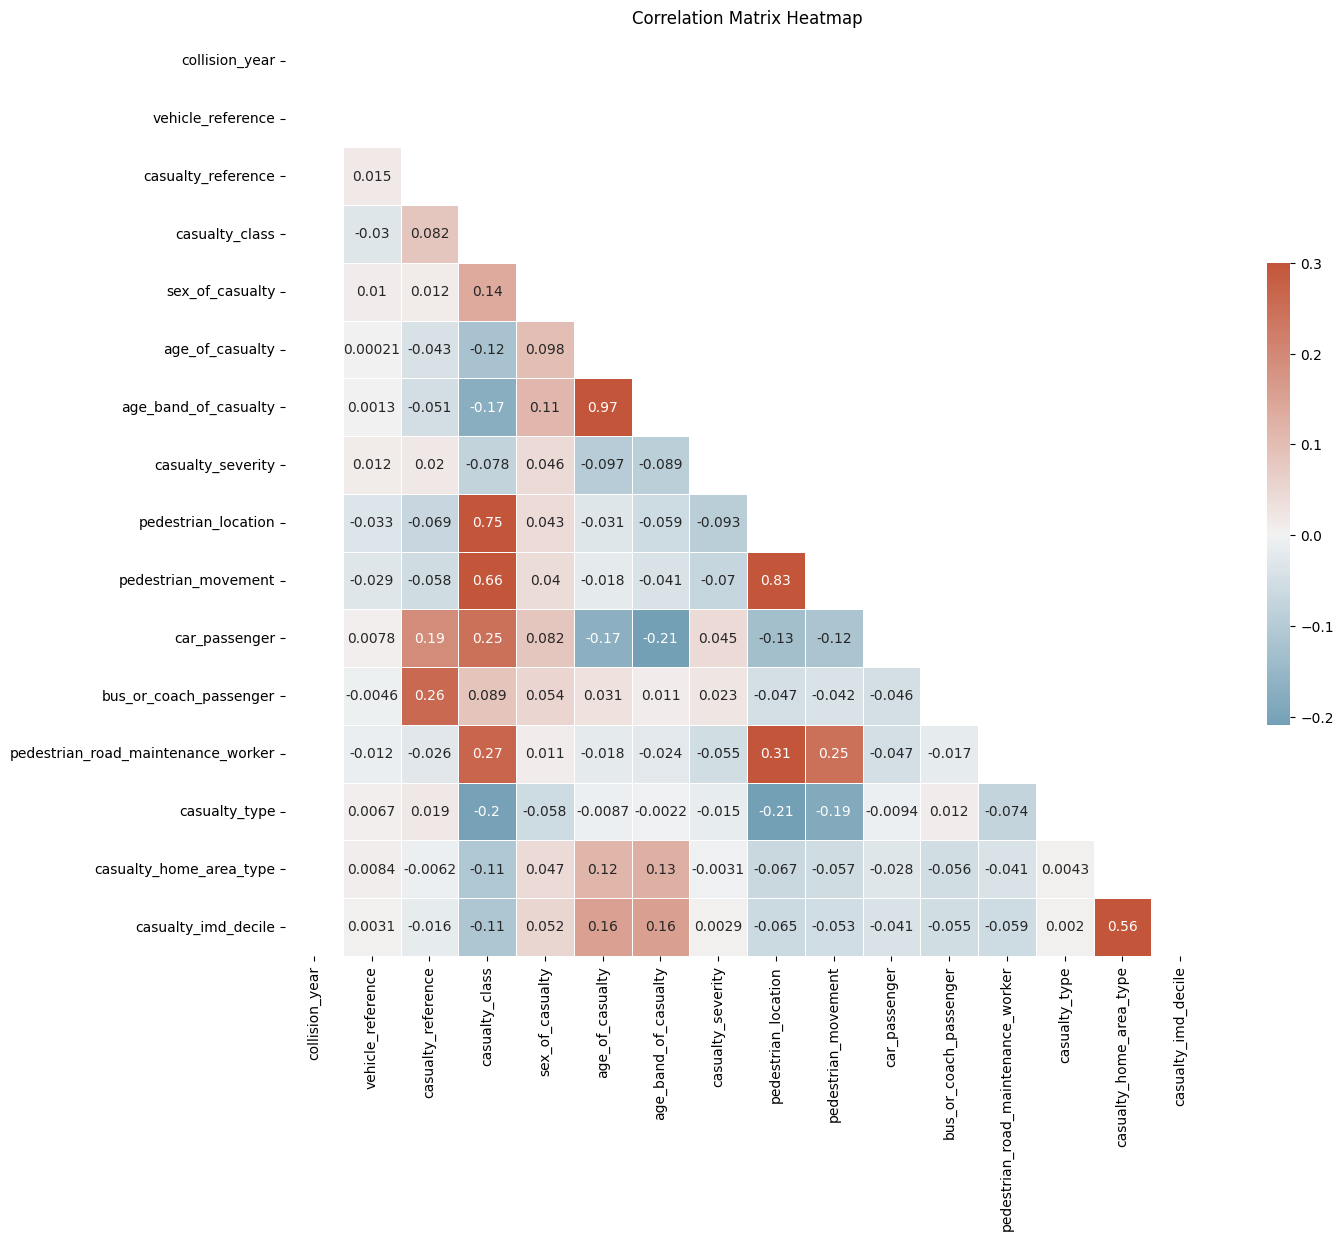

In [19]:
corr = df.corr(numeric_only = True)

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Matrix Heatmap')
plt.show()